# Linear Regression Tutorial
We train and evaluate a linear regression model using the California Housing Prices dataset downloaded from Kaggle via `kagglehub`, focusing on three practical predictors (total rooms, total bedrooms, and median income). The notebook covers the end-to-end workflow from data acquisition to evaluation.

## 1. Load Libraries
We import numerical utilities, data handling helpers, the Kaggle downloader, the linear regression model, and regression metrics.

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Load Dataset
We download the California Housing Prices dataset from Kaggle with `kagglehub`, retain three core numeric predictors (total rooms, total bedrooms, median income), and split the data into training and testing sets.

In [ ]:
# Download Kaggle dataset and prepare train/test splits
import kagglehub
from sklearn.model_selection import train_test_split

path = kagglehub.dataset_download("camnugent/california-housing-prices")
csv_path = next(Path(path).glob("**/*.csv"))
housing = pd.read_csv(csv_path)
selected_features = ["total_rooms", "total_bedrooms", "median_income"]
housing = housing.dropna(subset=selected_features + ["median_house_value"])
feature_cols = selected_features
X = housing[feature_cols].values
y = housing["median_house_value"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

100%|██████████| 400k/400k [00:00<00:00, 615kB/s]

Extracting files...


((16346, 9), (4087, 9))

## 3. Train Model
We fit the linear regression model on the training data.

In [ ]:
# Fit the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr

LinearRegression()

## 4. Evaluate Performance
We predict on the test split and compute regression scores.

In [ ]:
# Evaluate predictions using mean squared error and R-squared
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(4802173538.604149, 0.6488402154432001)

## 5. Visualize Predictions
We compare predicted and actual median house values with a scatter plot to spot bias and variance patterns.

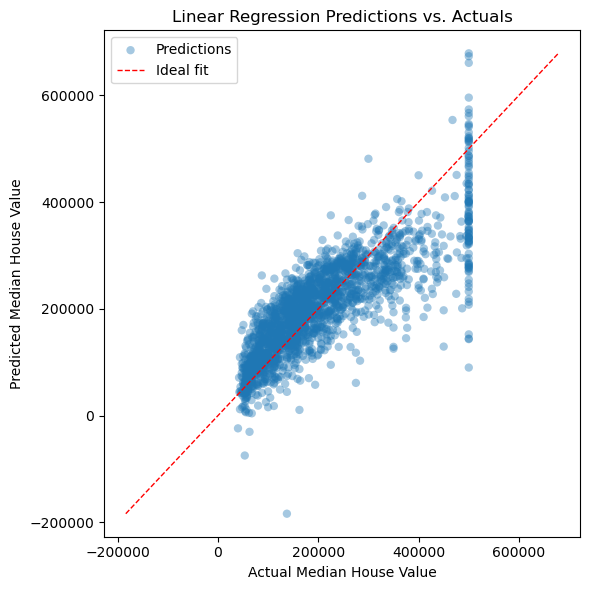

In [6]:
# Plot predicted vs actual median house values
rng = np.random.default_rng(42)
sample_size = min(2000, y_test.shape[0])
sample_idx = rng.choice(y_test.shape[0], size=sample_size, replace=False)
actual = y_test[sample_idx]
predicted = y_pred[sample_idx]

plt.figure(figsize=(6, 6))
plt.scatter(actual, predicted, alpha=0.4, edgecolor="none", label="Predictions")
plot_min = min(actual.min(), predicted.min())
plot_max = max(actual.max(), predicted.max())
plt.plot([plot_min, plot_max], [plot_min, plot_max], color="red", linestyle="--", linewidth=1, label="Ideal fit")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Linear Regression Predictions vs. Actuals")
plt.legend()
plt.tight_layout()
plt.show()

## 6. Try It Yourself
Enter custom feature values to generate a median house value prediction with the trained model.

In [ ]:
# Collect user-provided feature values and make a prediction
def ask_float(prompt: str, default: float) -> float:
    user_input = input(f"{prompt} [{default}]: ").strip()
    if not user_input:
        return default
    try:
        return float(user_input)
    except ValueError:
        print("Invalid number entered. Using default value.")
        return default

numeric_feature_names = feature_cols
numeric_defaults = housing[numeric_feature_names].median().to_dict()

user_numeric_values = [ask_float(name, numeric_defaults[name]) for name in numeric_feature_names]
user_features = np.array(user_numeric_values, dtype=float).reshape(1, -1)
predicted_value = lr.predict(user_features)[0]
print(f"Predicted median house value: ${predicted_value:,.2f}")

Predicted median house value: $-15,592,193.77


## 7. Inspect Coefficients
We review feature weights to understand the learned relationships.

In [7]:
# Display learned coefficients and intercept
coefficients = dict(enumerate(lr.coef_, start=1))
intercept = lr.intercept_
coefficients, intercept

({1: -27108.74632117835,
  2: -25657.807542675513,
  3: 1081.3642062736087,
  4: -6.322145519676435,
  5: 103.00404177118564,
  6: -36.409751368792925,
  7: 43.142724918123925,
  8: 39277.08301971277,
  9: -34269.44338726985,
  10: -73509.66116574466,
  11: 179383.93107555146,
  12: -40501.86026350654,
  13: -31102.966259030556},
 -2265004.318716148)